In [1]:
import numpy as np
import pandas as pd
#import po as po
import seaborn as sns 
import matplotlib.pyplot as plt # Visualization Library
import scipy.stats as stats


In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.shape

(7043, 21)

In [6]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [9]:
data.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-12-8da0f2ce6663>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


<AxesSubplot:>

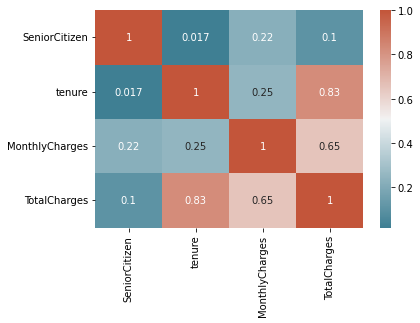

In [12]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


checking churn

In [16]:
data['TotalCharges'].isna().sum()

11

In [17]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isna().sum()

11

In [18]:
data['TotalCharges'].fillna(0, inplace=True)
data['TotalCharges'].isna().sum()

0

In [22]:
data.drop(['customerID'],axis=1,inplace=True)
data.replace({'No phone service':'No','No internet service':'No'},inplace=True)


In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
X=data.drop(['Churn'],axis=1)
y=data['Churn']
columns=[]
for i in X.columns:
    if len(X[i].unique()) < 5:
        columns.append(i)
columns
X=pd.get_dummies(X,columns=columns,drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


In [31]:


from sklearn.preprocessing import StandardScaler
columns=['tenure','MonthlyCharges']
X_scaled=StandardScaler().fit_transform(X[columns])
X['tenure']=X_scaled[:,0]
X['MonthlyCharges']=X_scaled[:,1]
X.head()

,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

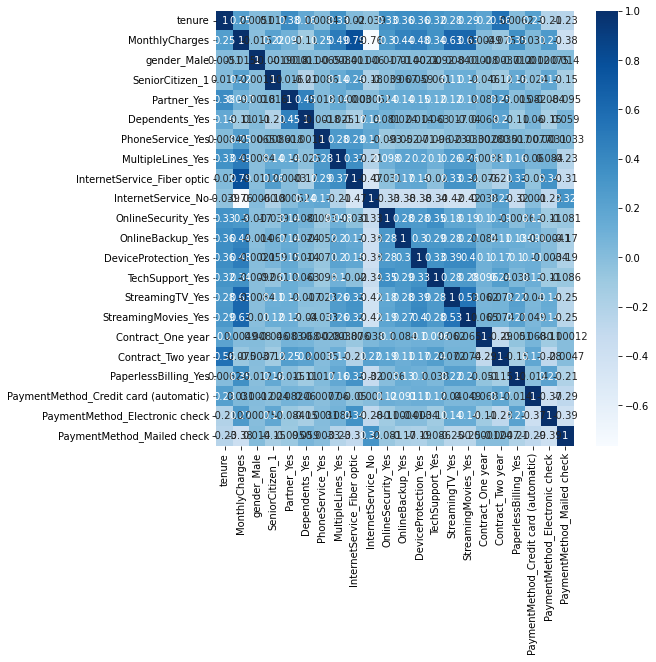

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True,cmap='Blues')

In [36]:
y=pd.get_dummies(y,drop_first=True)
y


,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


<AxesSubplot:xlabel='Yes', ylabel='count'>

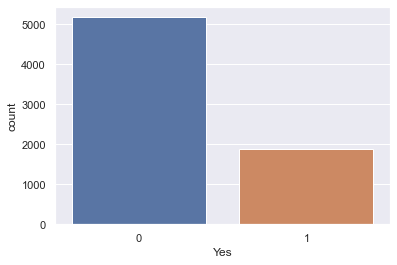

In [37]:
sns.countplot(data=y,x='Yes')

In [43]:
df = data.copy()

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Converting the rest of the object variables to dummies

cust_final = pd.get_dummies(df)
cust_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

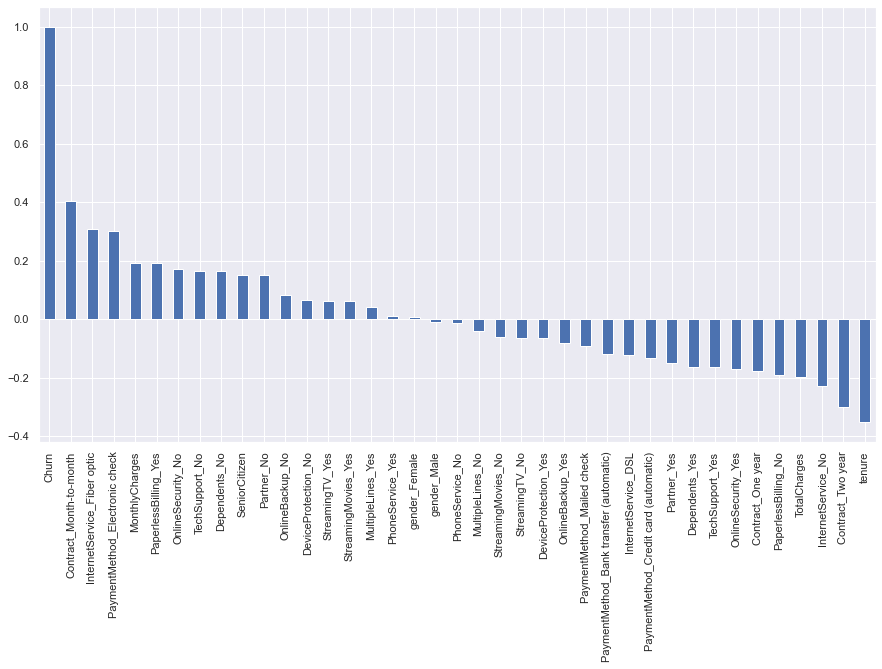

In [45]:
plt.figure(figsize=(15,8))


cust_final.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

Text(0.5, 1.0, 'Gender Distribution')

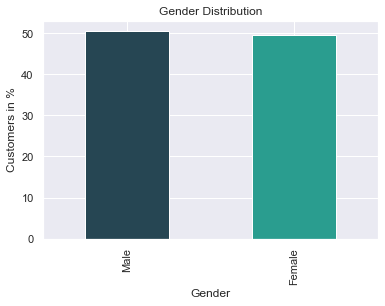

In [47]:
colors = ['#264653', '#2a9d8f']

ax = ((data['gender'].value_counts()/len(data['gender']))*100).plot(kind = 'bar', color = colors)

ax.set_ylabel('Customers in %')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

Text(0.5, 1.0, '# of Customers by their tenure')

<Figure size 720x360 with 0 Axes>

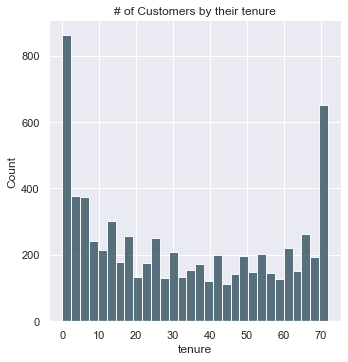

In [50]:

plt.figure(figsize = (10,5))

ax = sns.displot(data["tenure"], kde = False, bins = 30)
plt.title('# of Customers by their tenure')

<AxesSubplot:xlabel='Contract', ylabel='count'>

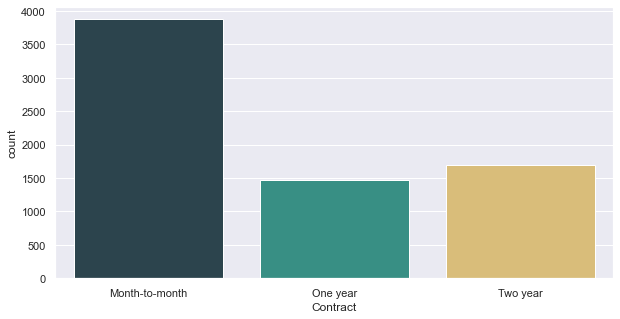

In [52]:
#number of customers by contract type
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.figure(figsize = (10,5))
sns.set_palette(sns.color_palette(colors))

sns.countplot(data = data, x = 'Contract')

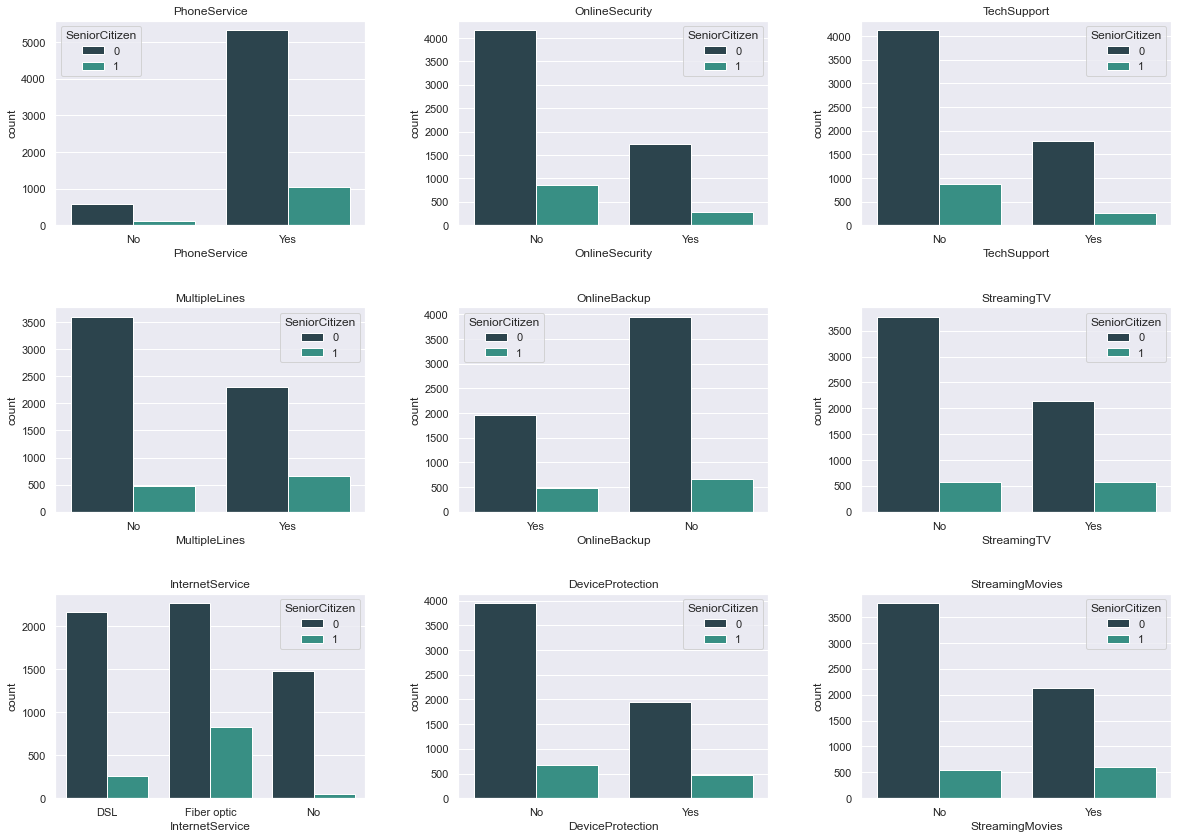

In [54]:
# Which services are used by the most customers?
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axs = plt.subplots(nrows = 3,ncols = 3,figsize = (20,12))
fig.tight_layout()

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1        # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.4   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)


for i, service in enumerate(services):
    if(i < 3):
        ax = sns.countplot(data = data, x = service, hue = 'SeniorCitizen', ax = axs[i,0])
        ax.set_title(service)
    elif(i >= 3 and i < 6):
        ax = sns.countplot(data = data, x = service, hue = 'SeniorCitizen', ax = axs[i-3,1])
        ax.set_title(service)
    elif(i < 9):
        ax = sns.countplot(data = data, x = service, hue = 'SeniorCitizen', ax = axs[i-6, 2])
        ax.set_title(service)

Text(0.5, 1.0, 'Churn by Contract Type')

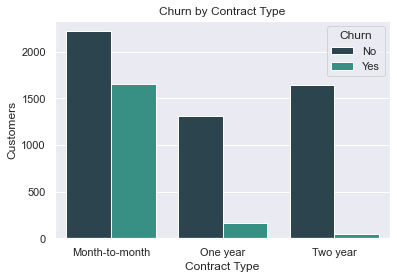

In [56]:
# churn by contract type
ax = sns.countplot(data = data, x = 'Contract', hue = 'Churn')

ax.set_ylabel('Customers')
ax.set_xlabel('Contract Type')
ax.set_title('Churn by Contract Type')

In [57]:
X = cust_final.drop('Churn', axis = 1)
y = cust_final['Churn']
features = X.columns.values
#scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.linear_model import LogisticRegression
# Logistic Model
logmodel = LogisticRegression()
# Model fitting
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
predictin = logmodel.predict(X_test)
from sklearn.metrics import classification_report
# Pridictinon For Test DataSet
print(classification_report(y_test, predictin))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1546
           1       0.67      0.53      0.60       567

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [62]:
from sklearn.metrics import accuracy_score
# Accuracy For Test  DataSet
accuracy_score(y_test,  predictin)

0.8054898248935163

Text(0.5, 1.0, 'Features with negative influence on churn')

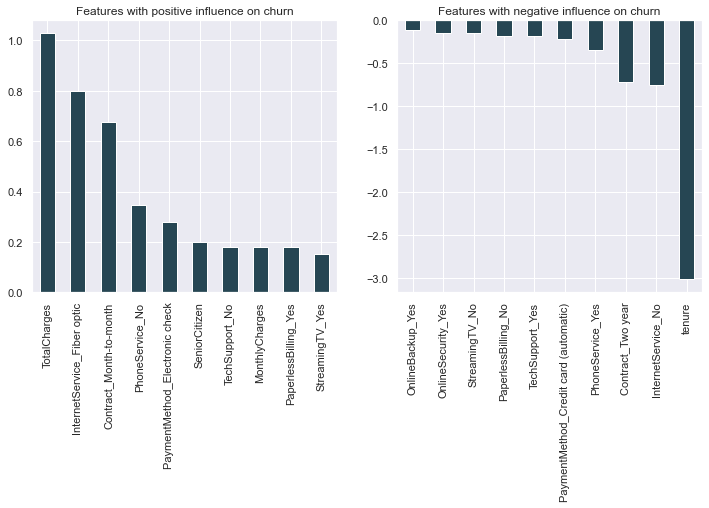

In [63]:
coef = pd.Series(log_reg.coef_[0], index = features)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5))

ax = coef.sort_values(ascending = False)[:10].plot(kind = 'bar', ax = axs[0])
ax.set_title('Features with positive influence on churn')

ax = coef.sort_values(ascending = False)[-10:].plot(kind = 'bar', ax = axs[1])
ax.set_title('Features with negative influence on churn')

In [75]:
print('The Model has an accuarcy of', round(metrics.accuracy_score(y_test, pred)*100, 4), '%')

The Model has an accuarcy of 79.2712 %


In [64]:
import pandas
from sklearn import tree
#import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from IPython.display import Image
#import graphviz

In [65]:
model_data2 = pd.get_dummies(data, drop_first = True)
x = model_data2.drop('Churn_Yes', axis = 1)
y = model_data2['Churn_Yes']
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=100)

In [66]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                     random_state = 100, max_depth = 11, min_samples_leaf=12)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12,
                       random_state=100)

In [67]:
y_pred_en = clf_entropy.predict(X_test)

In [68]:
print(("Accuracy is "), accuracy_score(y_test,y_pred_en)*100)

Accuracy is  77.75674396592522


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 1000, max_features = "auto", max_leaf_nodes = 30, n_jobs = -1)

rf_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', max_leaf_nodes=30,
                       n_estimators=1000, n_jobs=-1)

In [73]:
pred = rf_model.predict(X_test)

print('Accuracy of the Model is: ', round(metrics.accuracy_score(y_test, pred)*100, 4), '%')

Accuracy of the Model is:  79.2712 %


In [74]:
imp = rf_model.feature_importances_

weights = pd.DataFrame(imp, index=X.columns.values, columns = ['Weight'])

print(weights.sort_values(by ="Weight", ascending = False).head(10))


ax = weights.sort_values(by ="Weight", ascending = False)[:10].plot(kind = 'bar')

ax.set_title('Weight of features on churn probability')

ValueError: Shape of passed values is (23, 1), indices imply (38, 1)

In [44]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

<AxesSubplot:>

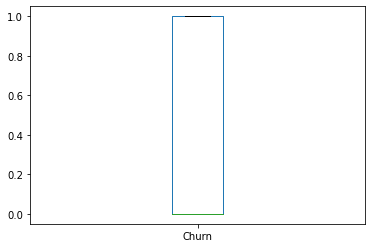

In [46]:
data['Churn'].plot.box()

<AxesSubplot:>

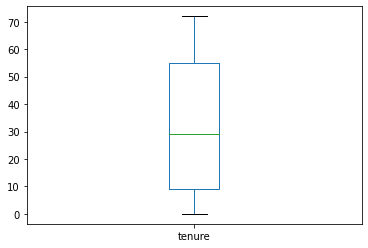

In [48]:
data['tenure'].plot.box()

<AxesSubplot:>

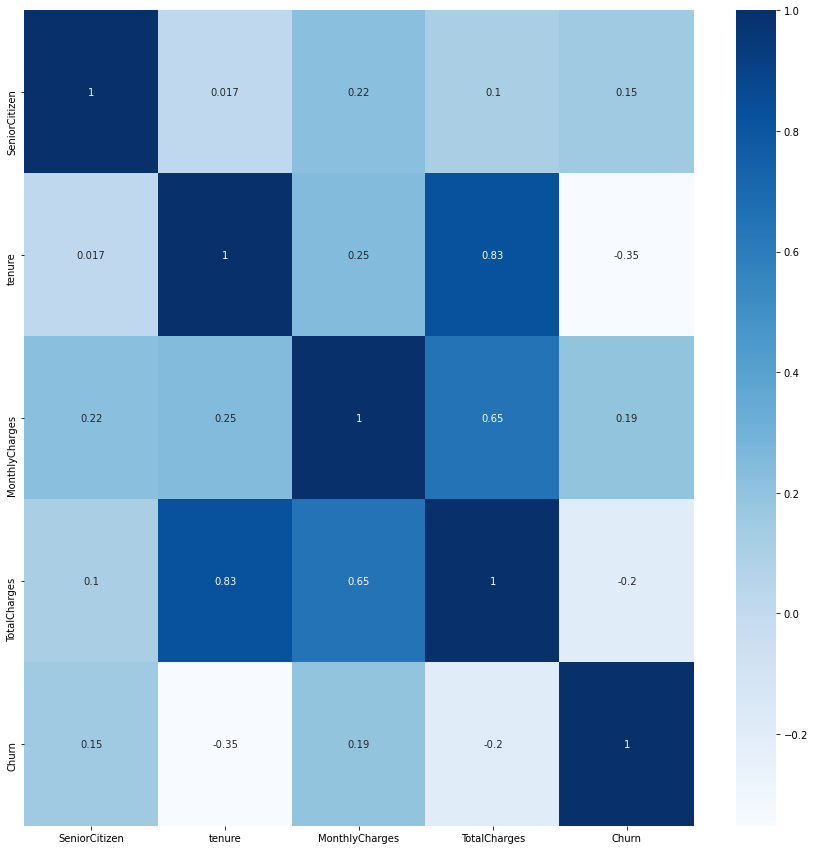

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

SeniorCitizen --------- 1.510066805092378e-36
gender --------- 0.48657873605618596
Partner --------- 2.1399113440759935e-36
Dependents --------- 4.9249216612154196e-43
tenure --------- 1.2807811055496877e-176
PhoneService --------- 0.3387825358066928
MultipleLines --------- 0.0034643829548773
InternetService --------- 9.571788222840544e-160
OnlineSecurity --------- 2.6611496351768565e-185
OnlineBackup --------- 2.0797592160865457e-131
DeviceProtection --------- 5.505219496457244e-122
TechSupport --------- 1.4430840279999813e-180
StreamingTV --------- 5.528994485739024e-82
StreamingMovies --------- 2.667756755723681e-82
Contract --------- 5.863038300673391e-258
PaperlessBilling --------- 4.073354668665985e-58
PaymentMethod --------- 3.6823546520097993e-140
MonthlyCharges --------- 1.8852727784254426e-18
TotalCharges --------- 0.5532461954861401
Churn --------- 0.0


<AxesSubplot:>

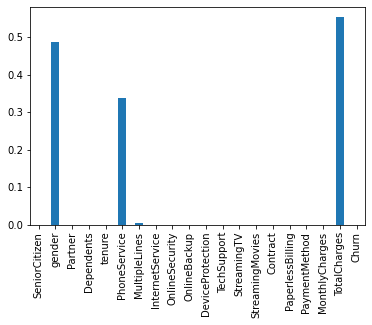

In [52]:
attributes = ['SeniorCitizen', 'gender','Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod','MonthlyCharges','TotalCharges','Churn']
pvalues = []
for i in attributes:
    c, p, dof, expected = stats.chi2_contingency(pd.crosstab(data['Churn'], data[i]))
    pvalues.append(p)
for x, y in zip(attributes, pvalues):
    print(f'{x} --------- {y}')
pattr_values = pd.Series(pvalues, index=attributes)
pattr_values.plot.bar()

In [77]:
df_corr  = pd.get_dummies(data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
                              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                              'PaymentMethod','Churn']]).corr()

In [78]:
df_corr.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,-0.008576,0.008576,-0.142948,...,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477,-0.150889,0.150889
gender_Female,0.001874,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,-0.006488,0.006488,-0.008414,...,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744,-0.008612,0.008612
gender_Male,-0.001874,-1.000000,1.000000,0.001808,-0.001808,-0.010517,0.010517,0.006488,-0.006488,0.008414,...,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744,0.008612,-0.008612
Partner_No,-0.016479,-0.001808,0.001808,1.000000,-1.000000,0.452676,-0.452676,0.017706,-0.017706,0.142057,...,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125,-0.150448,0.150448
Partner_Yes,0.016479,0.001808,-0.001808,-1.000000,1.000000,-0.452676,0.452676,-0.017706,0.017706,-0.142057,...,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.150448,-0.150448


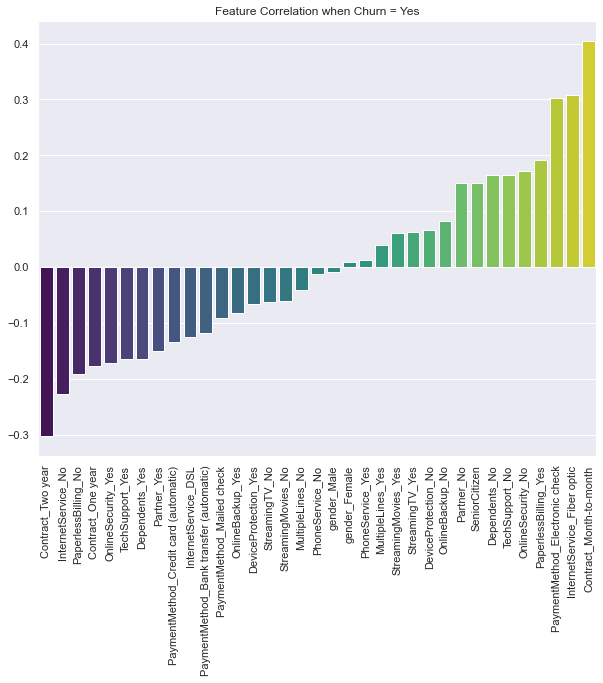

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index,y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values,palette='viridis')
plt.title('Feature Correlation when Churn = Yes')
plt.xticks(rotation=90);

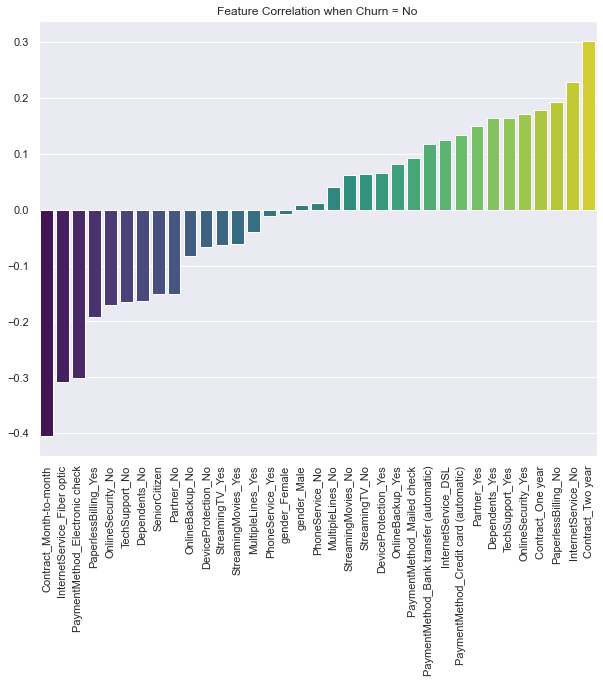

In [81]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_corr['Churn_No'].sort_values().iloc[1:-1].index,y=df_corr['Churn_No'].sort_values().iloc[1:-1].values,palette='viridis')
plt.title('Feature Correlation when Churn = No')
plt.xticks(rotation=90);